## ![](https://ga-dash.s3.amazonaws.com/production/assets/logo-9f88ae6c9c3871690e33280fcf557f33.png) Project 2: Bangkok Housing Data | Part 1: Cleaning Datasets

---

[README](../README.md) | **Part 1: Cleaning Datasets** | [Part 2: Regression Model](02_Regression.ipynb) | [Part 3: Interpretation](03_Interpretation.ipynb)

---

### Introduction
- We are going to clean the data on property prices for three `main property_types` (Condo, Detached House, and Townhouse), which have many features.
- We have two datasets: train (with the `price` column) and test (without the price column). Both datasets have the column `id` as a unique key.

### Import
- We import the essential library, i.e., `pandas`,`numpy`,`seaborn`,`matplotlib.pyplot` that helping us to clean data.

In [7]:
# pip install missingno

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("ggplot")
import plotly.express as px

### Load and Merge Data
- To simplify data cleaning, we merge the train and test datasets into a new DataFrame called `df`.
- Create a Series named `is_train` to identify the origin of the data (whether it comes from the training or test set)

In [10]:
train_df = pd.read_json('../data/train.json')
test_df = pd.read_json('../data/test.json')

In [11]:
train_df['is_train'] = 1               
test_df['is_train'] = 0
df = pd.concat([train_df, test_df], ignore_index = True)

In [12]:
df.head(1)

,id,province,district,subdistrict,address,property_type,total_units,bedrooms,baths,floor_area,...,nearby_stations,nearby_station_distance,nearby_bus_stops,nearby_supermarkets,nearby_shops,year_built,month_built,facilities,price,is_train
0,8448321,Bangkok,Watthana,Phra Khanong Nuea,"36 Soi Sukhumvit 63, Ekamai Road",Condo,273.0,2.0,2.0,66,...,2,"[[E7 Ekkamai BTS, 270], [E6 Thong Lo BTS, 800]]",NaN,16.0,20,2011,June,"[Car Park, Community Garden, CCTV, Fitness cor...",8500000.0,1


In [13]:
# df.query("province == 'Bangkok' and district == 'Phra Khanong' and property_type == 'Detached House'")

In [14]:
# Sample in presentation
# df.iloc[4456,]

### Cleaning Columns
- The DataFrame `df` have total of 24 features (including `is_train`), and 16,772 records.
- Half of all features are categorical variables:
  - `id`
  - `province`
  - `district`
  - `subdistrict`
  - `address`
  - `property_type`
  - `latitude`
  - `longitude`
  - `nearby_station_distance`
  - `year_built`
  - `month_built`
  - `facilites`
  - `is_train`
- The rest features are numeric variables:
    - `total_units`
    - `bedrooms`
    - `baths`
    - `floor_area`
    - `floor_level`
    - `land_area`
    - `nearby_stations`
    - `nearby_bus_stops`
    - `nearby_supermarkets`
    - `nearby_shops`
    - `price`.
- The core columns are `id`,`province`, `property_type`, `price` and `is_train`. Since different property types and main location tend to have distinct price ranges.
- Each column is cleaned individually, or dropped if unnecessary.
- The overall cleaning process is performed in various ways, with a focus on the following aspects
  - Handling `NaN` and 0 values
  - value of outliers
  - identifying and managing outliers
- Some columns that varies significantly is transformed by grouping into bins or classified into categories

#### List of Columns

In [17]:
df.dtypes   # List of columns and types

id                           int64
province                    object
district                    object
subdistrict                 object
address                     object
property_type               object
total_units                float64
bedrooms                   float64
baths                      float64
floor_area                   int64
floor_level                float64
land_area                  float64
latitude                   float64
longitude                  float64
nearby_stations              int64
nearby_station_distance     object
nearby_bus_stops           float64
nearby_supermarkets        float64
nearby_shops                 int64
year_built                   int64
month_built                 object
facilities                  object
price                      float64
is_train                     int64
dtype: object

#### `id`, `property_type` and `is_train`
- `id`: This column serves as the unique identifier for each property, ensuring that no two properties share the same ID.
- `property_type`: This is a critical feature because different property types (e.g., Condo, Detached House, Townhouse) tend to have distinct price ranges.
- `is_train`: This column indicates whether the data point belongs to the training set (True) or the test set (False), helping to differentiate the source of the data.

It’s important to check each column by grouping the data by `property_type` and `is_train` to better understand how the properties vary in these groups.

In [19]:
kc = ['property_type','is_train']       # make list of key column

#### `province`
- There are no `NaN` values in this column.
- Each group contains the same 3 unique values: Bangkok, Nonthaburi, and Samut Prakan.
- No cleaning is necessary.

In [21]:
# Check NaN
df.groupby(kc)['province'].agg(lambda group: (group.isnull().mean() * 100).round(2))

property_type   is_train
Condo           0           0.0
                1           0.0
Detached House  0           0.0
                1           0.0
Townhouse       0           0.0
                1           0.0
Name: province, dtype: float64

In [22]:
# Check Unique Values
df.groupby(kc)['province'].unique().apply(np.sort)

property_type   is_train
Condo           0           [Bangkok, Nonthaburi, Samut Prakan]
                1           [Bangkok, Nonthaburi, Samut Prakan]
Detached House  0           [Bangkok, Nonthaburi, Samut Prakan]
                1           [Bangkok, Nonthaburi, Samut Prakan]
Townhouse       0           [Bangkok, Nonthaburi, Samut Prakan]
                1           [Bangkok, Nonthaburi, Samut Prakan]
Name: province, dtype: object

#### `district`
- There are no `NaN` values in this column.
- For each `property_type`, the number of unique values of train dataset greater than in test dataset.
- No cleaning is necessary.

In [24]:
# Check NaNs
df.groupby(kc)['district'].agg(lambda group: (group.isnull().mean() * 100).round(2))

property_type   is_train
Condo           0           0.0
                1           0.0
Detached House  0           0.0
                1           0.0
Townhouse       0           0.0
                1           0.0
Name: district, dtype: float64

In [25]:
# Check Unique Values
df.groupby(kc)['district'].nunique()

property_type   is_train
Condo           0           47
                1           50
Detached House  0           39
                1           52
Townhouse       0           45
                1           52
Name: district, dtype: int64

In [26]:
sorted(df['district'].unique())

['Bang Bo',
 'Bang Bon',
 'Bang Bua Thong',
 'Bang Kapi',
 'Bang Khae',
 'Bang Khen',
 'Bang Kho Laem',
 'Bang Khun Thian',
 'Bang Kruai',
 'Bang Na',
 'Bang Phlat',
 'Bang Phli',
 'Bang Rak',
 'Bang Sao Thong',
 'Bang Sue',
 'Bang Yai',
 'Bangkok Noi',
 'Bangkok Yai',
 'Bueng Kum',
 'Chatuchak',
 'Chom Thong',
 'Din Daeng',
 'Don Mueang',
 'Huai Khwang',
 'Khan Na Yao',
 'Khlong Sam Wa',
 'Khlong San',
 'Khlong Toei',
 'Lak Si',
 'Lat Krabang',
 'Lat Phrao',
 'Min Buri',
 'Mueang Nonthaburi',
 'Mueang Samut Prakan',
 'Nong Chok',
 'Nong Khaem',
 'Pak Kret',
 'Pathum Wan',
 'Phasi Charoen',
 'Phaya Thai',
 'Phra Khanong',
 'Phra Pradaeng',
 'Phra Samut Jadee',
 'Prawet',
 'Rat Burana',
 'Ratchathewi',
 'Sai Mai',
 'Sai Noi',
 'Saphan Sung',
 'Sathon',
 'Suan Luang',
 'Taling Chan',
 'Thawi Watthana',
 'Thon Buri',
 'Thung Khru',
 'Wang Thonglang',
 'Watthana',
 'Yan Nawa']

#### `subdistrict`, `address`, `latitude`, and `longitude`
- We will drop these columns because they are non-numeric, have too many values, and also related to `province` and `district`.

In [28]:
# Check Unique Values
df.groupby(kc)[['subdistrict', 'address', 'latitude', 'longitude']].nunique()

subdistrict  address  latitude  longitude
property_type  is_train                                           
Condo          0                 130      705       776        774
               1                 162     1174      1324       1322
Detached House 0                 105      245       285        279
               1                 163      768      1251       1233
Townhouse      0                 121      317       421        412
               1                 162      978      1738       1721

In [29]:
df.drop(columns = ['subdistrict', 'address', 'latitude', 'longitude'], inplace = True, errors = 'ignore')

#### `total_units`, and `month_built`
- We will drop these columns because, in the `property_type` of Detached House and Townhouse, more than 50% of their values are `NaN`.

In [31]:
# Check NaNs
df.groupby(kc)[['total_units','month_built']].agg(lambda group: (group.isnull().mean() * 100).round(2))

total_units  month_built
property_type  is_train                          
Condo          0                1.89         9.16
               1                1.88         9.66
Detached House 0               67.44        97.98
               1               65.51        97.28
Townhouse      0               73.06        99.22
               1               74.86        99.27

In [32]:
df.drop(columns = ['total_units','month_built'], inplace = True, errors = 'ignore')

#### `bedrooms`
- In the training dataset, calculate the median and determine the bounds for outliers for each `property_type`.
- Use the median to impute `NaN` values for both the training and test datasets.
- Based on the outlier bounds, create a new column `has_many_bedrooms` to indicate whether the number of `bedrooms` exceeds the bound.

In [34]:
# Check NaN
df.groupby(kc)['bedrooms'].agg(lambda group: (group.isnull().mean() * 100).round(2))

property_type   is_train
Condo           0           0.37
                1           0.23
Detached House  0           0.58
                1           0.51
Townhouse       0           0.39
                1           0.38
Name: bedrooms, dtype: float64

In [35]:
# Check Statistic
df.groupby(kc)['bedrooms'].describe()

count      mean       std  min  25%  50%  75%   max
property_type  is_train                                                      
Condo          0         1631.0  1.174126  0.387336  1.0  1.0  1.0  1.0   3.0
               1         9185.0  1.188568  0.409677  1.0  1.0  1.0  1.0   8.0
Detached House 0          345.0  3.336232  0.768185  1.0  3.0  3.0  4.0  10.0
               1         2158.0  3.341520  0.780291  1.0  3.0  3.0  4.0  10.0
Townhouse      0          514.0  2.988327  0.751775  1.0  3.0  3.0  3.0   7.0
               1         2885.0  2.991681  0.737776  1.0  3.0  3.0  3.0  10.0

In [36]:
# Impute NaN with training's median of each property

props = ['Condo', 'Detached House', 'Townhouse']          # This list will be reused

for prop in props:                                                                                        # loop to each property_type
    bedrooms_median = df[(df['property_type'] == prop) & (df['is_train'] == 1)]['bedrooms'].median()      # training's median
    df.loc[(df['property_type'] == prop) & (df['bedrooms'].isna()), 'bedrooms'] = bedrooms_median         # impute to NaN  

In [37]:
# Create column has_many_bedrooms and initiate it to 0

df['has_many_bedrooms'] = 0

for prop in props:
    # Find lower bound and upper bound
    bedrooms_q1 = df[(df['property_type'] == prop) & (df['is_train'] == 1)]['bedrooms'].quantile(.25)
    bedrooms_q3 = df[(df['property_type'] == prop) & (df['is_train'] == 1)]['bedrooms'].quantile(.75)
    bedrooms_iqr = bedrooms_q3 - bedrooms_q1
    bedrooms_lb = bedrooms_q1 - 1.5 * bedrooms_iqr
    bedrooms_ub = bedrooms_q3 + 1.5 * bedrooms_iqr
    # if the number of bedrooms is outside the upper bound, set it to 1
    df.loc[(df['property_type'] == prop), 'has_many_bedrooms'] = (df['bedrooms'] > bedrooms_ub).astype(int)

In [38]:
# Check Unique Values
df.groupby(['property_type','is_train','has_many_bedrooms'])['bedrooms'].value_counts(dropna = False).unstack(fill_value = 0)

bedrooms                                   1.0   2.0   3.0   4.0   5.0   6.0   \
property_type  is_train has_many_bedrooms                                       
Condo          0        0                  1358     0     0     0     0     0   
                        1                     0   274     5     0     0     0   
               1        0                  7520     0     0     0     0     0   
                        1                     0  1650    32     1     2     0   
Detached House 0        0                     3    11   225    91    13     0   
                        1                     0     0     0     0     0     3   
               1        0                    14    99  1372   562    83     0   
                        1                     0     0     0     0     0    29   
Townhouse      0        0                     3   112   309     0     0     0   
                        1                     0     0     0    77    12     1   
               1        0                    23   578  1786     0     0     0   
                        1                     0     0     0   451    39    13   

bedrooms                                   7.0   8.0   9.0   10.0  
property_type  is_train has_many_bedrooms                          
Condo          0        0                     0     0     0     0  
                        1                     0     0     0     0  
               1        0                     0     0     0     0  
                        1                     0     1     0     0  
Detached House 0        0                     0     0     0     0  
                        1                     0     0     0     1  
               1        0                     0     0     0     0  
                        1                     6     1     1     2  
Townhouse      0        0                     0     0     0     0  
                        1                     2     0     0     0  
               1        0                     0     0     0     0  
                        1                     1     3     1     1

#### `baths`
- In the training dataset, calculate the median and determine the bounds for outliers for each `property_type`.
- Use the median to impute `NaN` values and 0 for both the training and test datasets.
- Based on the outlier bounds, create a new column `has_many_baths` to indicate whether the number of `baths` exceeds the bound.

In [40]:
# Check NaN
df.groupby(kc)['baths'].agg(lambda group: (group.isnull().mean() * 100).round(2))

property_type   is_train
Condo           0           0.43
                1           0.21
Detached House  0           0.58
                1           0.37
Townhouse       0           0.19
                1           0.28
Name: baths, dtype: float64

In [41]:
df.groupby(kc)['baths'].describe()

count      mean       std  min  25%  50%  75%  max
property_type  is_train                                                     
Condo          0         1630.0  1.100613  0.308961  0.0  1.0  1.0  1.0  3.0
               1         9187.0  1.109938  0.330430  0.0  1.0  1.0  1.0  8.0
Detached House 0          345.0  2.675362  0.693912  1.0  2.0  3.0  3.0  5.0
               1         2161.0  2.684405  0.806445  0.0  2.0  3.0  3.0  9.0
Townhouse      0          515.0  2.466019  0.771773  1.0  2.0  2.0  3.0  6.0
               1         2888.0  2.437673  0.760285  0.0  2.0  2.0  3.0  7.0

In [42]:
# Check Unique Values
df.groupby(kc)['baths'].value_counts(dropna = False).unstack(fill_value = 0)

baths                    0.0   1.0   2.0   3.0  4.0  5.0  6.0  7.0  8.0  9.0  \
property_type  is_train                                                        
Condo          0           2  1464   162     2    0    0    0    0    0    0   
               1          16  8165   992    12    1    0    0    0    1    0   
Detached House 0           0     6   134   176   24    5    0    0    0    0   
               1           3    58   842  1054  146   43   11    1    2    1   
Townhouse      0           0    13   312   139   40   10    1    0    0    0   
               1           2    95  1741   789  220   32    7    2    0    0   

baths                    NaN  
property_type  is_train       
Condo          0           7  
               1          19  
Detached House 0           2  
               1           8  
Townhouse      0           1  
               1           8

In [43]:
# Impute NaN and 0 with training's median of each property
# props = ['Condo', 'Detached House', 'Townhouse']

for prop in props:                                                                                        # loop to each property_type
    baths_median = df[(df['property_type'] == prop) & (df['is_train'] == 1)]['baths'].median()            # training's median
    df.loc[(df['property_type'] == prop) & (df['baths'].isna()), 'baths'] = baths_median                  # impute to NaN
    df.loc[(df['property_type'] == prop) & (df['baths'] == 0), 'baths'] = baths_median                    # impute to 0

In [44]:
# Create column has_many_baths and initiate it to 0

df['has_many_baths'] = 0

for prop in props:
    # Find lower bound and upper bound
    baths_q1 = df[(df['property_type'] == prop) & (df['is_train'] == 1)]['baths'].quantile(.25)
    baths_q3 = df[(df['property_type'] == prop) & (df['is_train'] == 1)]['baths'].quantile(.75)
    baths_iqr = baths_q3 - baths_q1
    baths_lb = baths_q1 - 1.5 * baths_iqr
    baths_ub = baths_q3 + 1.5 * baths_iqr
    # if the number of baths is outside the upper bound, set it to 1
    df.loc[(df['property_type'] == prop), 'has_many_baths'] = (df['baths'] > baths_ub).astype(int)

In [45]:
# Check Unique Values
df.groupby(['property_type','is_train','has_many_baths'])['baths'].value_counts(dropna = False).unstack(fill_value = 0)

baths                                    1.0   2.0   3.0  4.0  5.0  6.0  7.0  \
property_type  is_train has_many_baths                                         
Condo          0        0               1473     0     0    0    0    0    0   
                        1                  0   162     2    0    0    0    0   
               1        0               8200     0     0    0    0    0    0   
                        1                  0   992    12    1    0    0    0   
Detached House 0        0                  6   134   178   24    0    0    0   
                        1                  0     0     0    0    5    0    0   
               1        0                 58   842  1065  146    0    0    0   
                        1                  0     0     0    0   43   11    1   
Townhouse      0        0                 13   313   139   40    0    0    0   
                        1                  0     0     0    0   10    1    0   
               1        0                 95  1751   789  220    0    0    0   
                        1                  0     0     0    0   32    7    2   

baths                                   8.0  9.0  
property_type  is_train has_many_baths            
Condo          0        0                 0    0  
                        1                 0    0  
               1        0                 0    0  
                        1                 1    0  
Detached House 0        0                 0    0  
                        1                 0    0  
               1        0                 0    0  
                        1                 2    1  
Townhouse      0        0                 0    0  
                        1                 0    0  
               1        0                 0    0  
                        1                 0    0

#### `floor_area`
- The floor area displays trends of high positive skewness.
- To address the high positive skewness observed in the floor area data, we consider applying a log transformation and obtain a new column `log_floor_area`.

In [47]:
# Check NaN
df.groupby(kc)['floor_area'].agg(lambda group: (group.isnull().mean() * 100).round(2))

property_type   is_train
Condo           0           0.0
                1           0.0
Detached House  0           0.0
                1           0.0
Townhouse       0           0.0
                1           0.0
Name: floor_area, dtype: float64

In [48]:
df.groupby(kc)['floor_area'].skew()

property_type   is_train
Condo           0           1.592339
                1           4.133731
Detached House  0           2.002849
                1           2.168523
Townhouse       0           1.138485
                1           1.621942
Name: floor_area, dtype: float64

In [49]:
df.groupby(kc)['floor_area'].median()

property_type   is_train
Condo           0            34.0
                1            35.0
Detached House  0           172.0
                1           171.0
Townhouse       0           116.0
                1           116.0
Name: floor_area, dtype: float64

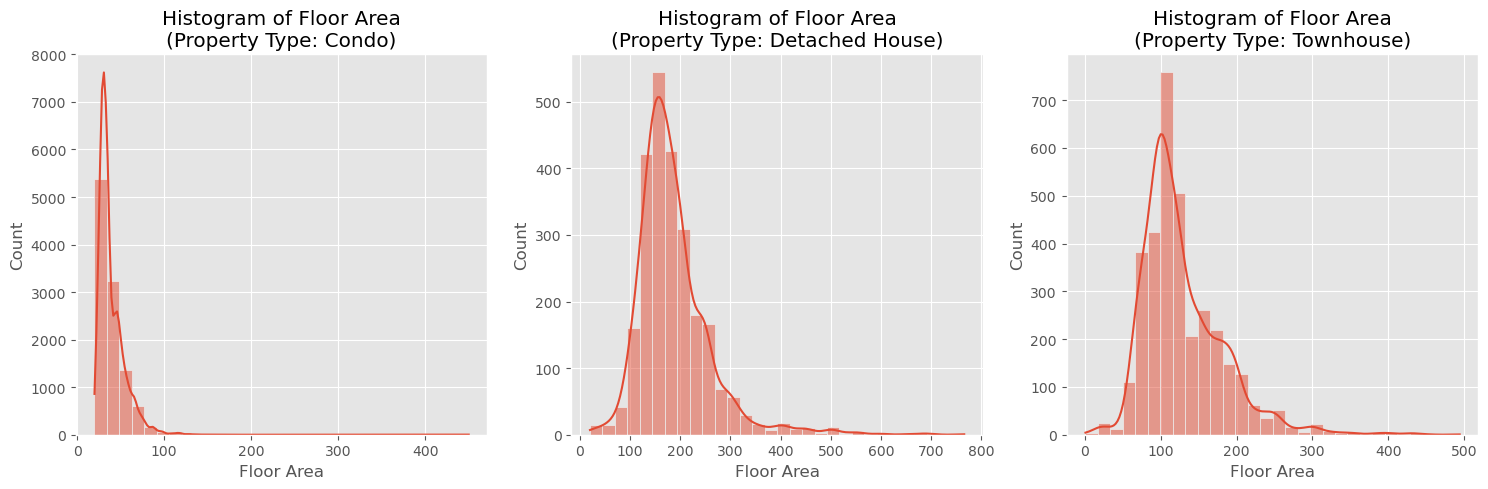

In [50]:
property_types = df['property_type'].unique()

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=len(property_types), figsize=(15, 5))

# Loop through each property type and create a histogram
for ax, property_type in zip(axes, property_types):
    sns.histplot(data=df[df['property_type'] == property_type],
                 x = 'floor_area', 
                 bins = 30, 
                 kde = True, 
                 ax = ax)
    ax.set_title(f'Histogram of Floor Area\n(Property Type: {property_type})')
    ax.set_xlabel('Floor Area')
    ax.set_ylabel('Count')

# Adjust layout
plt.tight_layout()
plt.show()

In [51]:
df['log_floor_area'] = np.log(df['floor_area'])

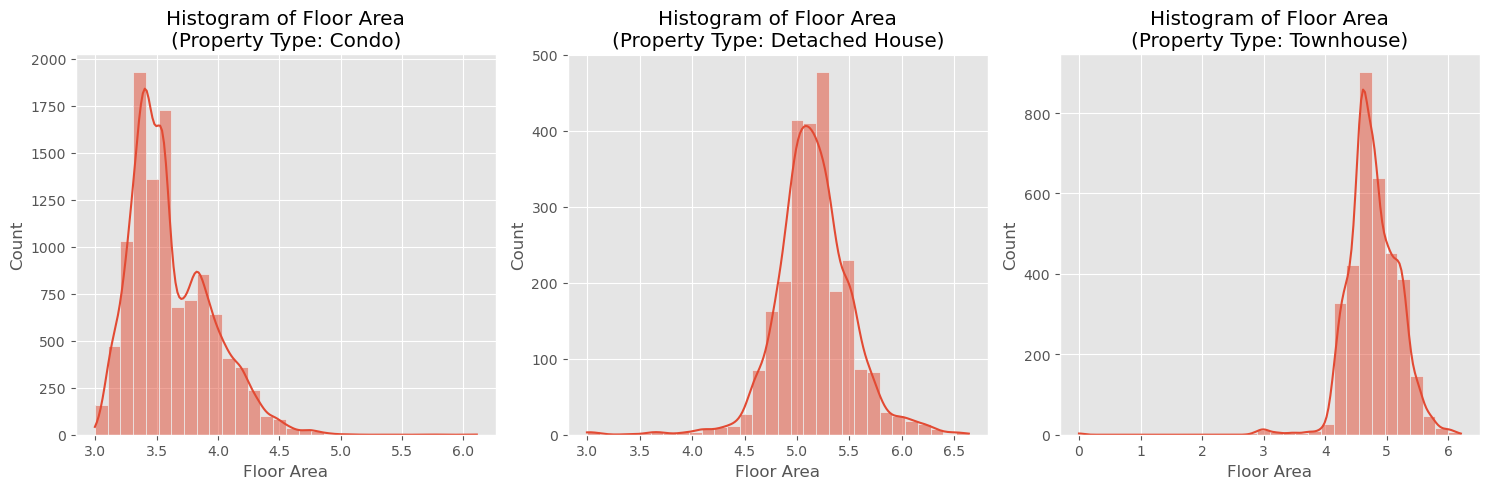

In [52]:
property_types = df['property_type'].unique()

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=len(property_types), figsize=(15, 5))

# Loop through each property type and create a histogram
for ax, property_type in zip(axes, property_types):
    sns.histplot(data=df[df['property_type'] == property_type],
                 x = 'log_floor_area', 
                 bins = 30, 
                 kde = True, 
                 ax = ax)
    ax.set_title(f'Histogram of Floor Area\n(Property Type: {property_type})')
    ax.set_xlabel('Floor Area')
    ax.set_ylabel('Count')

# Adjust layout
plt.tight_layout()
plt.show()

In [53]:
# Skewness is reducing

df.groupby(kc)['log_floor_area'].skew()

property_type   is_train
Condo           0           0.773443
                1           0.920872
Detached House  0          -0.949977
                1          -0.262562
Townhouse       0          -0.480311
                1          -1.580597
Name: log_floor_area, dtype: float64

#### `floor_level`
- The column `floor_level` has `NaN` values but no zeros.
- Since approximately 85% of Detached House and Townhouse have `floor_level` as `NaN`, we set them all to 0.
- In case of Condo, we impute around 20% of `NaN` with training's median of `floor_level`

In [55]:
df.groupby(kc)['floor_level'].agg(lambda group: (group.isnull().mean() * 100).round(2))

property_type   is_train
Condo           0           21.69
                1           20.18
Detached House  0           87.61
                1           85.06
Townhouse       0           85.27
                1           85.46
Name: floor_level, dtype: float64

In [56]:
# Check Unique Values
df.groupby(kc)['floor_level'].unique().apply(np.sort)

property_type   is_train
Condo           0           [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, ...
                1           [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, ...
Detached House  0                                        [1.0, 2.0, 3.0, nan]
                1            [1.0, 2.0, 3.0, 4.0, 7.0, 12.0, 13.0, 24.0, nan]
Townhouse       0                                   [1.0, 2.0, 3.0, 4.0, nan]
                1                        [1.0, 2.0, 3.0, 4.0, 5.0, 12.0, nan]
Name: floor_level, dtype: object

In [57]:
# Set floor_level to 0 in case of Detached House and Townhouse

df.loc[(df['property_type'] == 'Detached House'), 'floor_level'] = 0
df.loc[(df['property_type'] == 'Townhouse'), 'floor_level'] = 0                          # Note that after both steps, NaN appears only in Condos

# Set floor_level to Median in case of Condo

median_floor_level_condo = df[(df['property_type'] == 'Condo') & (df['is_train'] == 1)]['floor_level'].median() 
df.loc[(df['property_type'] == 'Condo') & (df['floor_level'].isna()), 'floor_level'] = median_floor_level_condo

#### `land_area`
- All condos have a `land_area` recorded as `NaN`, which we will set to zero.
- Approximately 3% of Detached Houses and Townhouses have `land_area` values recorded as `NaN`, which we will impute with the median `land_area` for each `property_type`.
- The land area displays trends of high positive skewness.
- To address the high positive skewness observed in the land area data, we consider applying a log transformation and obtain a new column `land_floor_area`.

In [59]:
# Check NaN
df.groupby(kc)['land_area'].agg(lambda group: (group.isnull().mean() * 100).round(2))

property_type   is_train
Condo           0           100.00
                1           100.00
Detached House  0             3.17
                1             2.54
Townhouse       0             2.13
                1             3.21
Name: land_area, dtype: float64

In [60]:
df.groupby(kc)['land_area'].describe()

count        mean          std   min    25%    50%  \
property_type  is_train                                                        
Condo          0            0.0         NaN          NaN   NaN    NaN    NaN   
               1            0.0         NaN          NaN   NaN    NaN    NaN   
Detached House 0          336.0  226.035714    73.435759  64.0  199.0  216.0   
               1         2114.0  363.303690  3614.738823  20.0  196.0  216.0   
Townhouse      0          505.0  101.893069   139.405300  20.0   72.0   84.0   
               1         2803.0  152.204067  2608.797588  16.0   72.0   84.0   

                           75%       max  
property_type  is_train                   
Condo          0           NaN       NaN  
               1           NaN       NaN  
Detached House 0         260.0     720.0  
               1         260.0  121600.0  
Townhouse      0         104.0    2516.0  
               1         104.0  137664.0

In [61]:
df.groupby(kc)['land_area'].skew()

property_type   is_train
Condo           0                 NaN
                1                 NaN
Detached House  0            1.399465
                1           31.772651
Townhouse       0           13.808752
                1           52.327878
Name: land_area, dtype: float64

In [62]:
# Set land_area to 0 in case of Condo

df.loc[(df['property_type'] == 'Condo'), 'land_area'] = 0

# Set land_area to Median in case of Detached House and Townhouse

for prop in ['Detached House','Townhouse']:
    median_land_area = df[(df['property_type'] == prop) & (df['is_train'] == 1)]['land_area'].median() 
    df.loc[(df['property_type'] == prop) & (df['land_area'].isna()), 'land_area'] = median_land_area

In [63]:
# Set to 0, if land_area = 0 in case of Condo

import warnings
warnings.filterwarnings("ignore", category = RuntimeWarning)        # We already beware of log(0)

df['log_land_area'] = np.where(df['land_area'] > 0, np.log(df['land_area']), 0)

#### `nearby_stations` and `nearby_station_distance`
- The column `nearby_stations` has no `NaN` values.
- By the way, if `nearby_stations` is 0, then `nearby_station_distance` is `NaN`
- The column `nearby_station_distance` holds values as the collection of lists, station_name and distance in meters.
- We'll extract the minimum distance and the station name from each list and store it in a new column called `minimum_station_distance`. If the list is empty (`nearby_stations` is 0), we'll assign a value of 0.
- Then, we drop the original column `nearby_station_distance`.

In [65]:
# Check NaN for nearby_stations
df.groupby(kc)['nearby_stations'].agg(lambda group: (group.isnull().mean() * 100).round(2))

property_type   is_train
Condo           0           0.0
                1           0.0
Detached House  0           0.0
                1           0.0
Townhouse       0           0.0
                1           0.0
Name: nearby_stations, dtype: float64

In [66]:
# Check NaN of nearby_station_distance for each nearby_stations
df.groupby('nearby_stations')['nearby_station_distance'].agg(lambda group: (group.isnull().mean() * 100).round(2))

nearby_stations
0    100.0
1      0.0
2      0.0
3      0.0
Name: nearby_station_distance, dtype: float64

In [67]:
# nearest_station_name
def extract_nearest_station(station_list):
    if not station_list:
        return np.nan
    min_distance_index = min(range(len(station_list)), key = lambda i: station_list[i][1])
    return station_list[min_distance_index][0]

# Apply the function to create a new column
df['nearest_station_name'] = df['nearby_station_distance'].apply(extract_nearest_station)

# Check the results
df[['nearby_station_distance', 'nearest_station_name']].head(5)

,nearby_station_distance,nearest_station_name
0,"[[E7 Ekkamai BTS, 270], [E6 Thong Lo BTS, 800]]",E7 Ekkamai BTS
1,"[[BL22 Sukhumvit MRT, 720], [BL21 Phetchaburi ...",BL22 Sukhumvit MRT
2,"[[E5 Phrom Phong BTS, 650], [BL23 Queen Siriki...",E5 Phrom Phong BTS
3,None,NaN
4,"[[PP09 Yaek Nonthaburi 1 MRT, 10]]",PP09 Yaek Nonthaburi 1 MRT


In [68]:
# nearesr_station_distance
# create function and then use .apply

def extract_nearest_station_distance(station_list):            # function to extract the minimum distance
    if not station_list:                                       # Empty list equivalent to False
        return 0                                               # Return NaN if list is empty
    return min([station[1] for station in station_list])       # List comprehension to extract the distance in position 1 and apply(min)

# Apply the function to create a new column
df['nearest_station_distance'] = df['nearby_station_distance'].apply(extract_nearest_station_distance)

# Check the results
df[['nearby_station_distance','nearest_station_distance']].head(5)

,nearby_station_distance,nearest_station_distance
0,"[[E7 Ekkamai BTS, 270], [E6 Thong Lo BTS, 800]]",270
1,"[[BL22 Sukhumvit MRT, 720], [BL21 Phetchaburi ...",720
2,"[[E5 Phrom Phong BTS, 650], [BL23 Queen Siriki...",650
3,None,0
4,"[[PP09 Yaek Nonthaburi 1 MRT, 10]]",10


In [69]:
# Check distribution of `nearby_station`

df.groupby(kc)['nearby_stations'].value_counts(dropna = False).unstack(fill_value = 0)

nearby_stations             0     1     2     3
property_type  is_train                        
Condo          0          437   410   511   279
               1         2438  2177  2915  1676
Detached House 0          324    18     5     0
               1         2032    89    46     2
Townhouse      0          461    41    14     0
               1         2573   226    90     7

In [70]:
# Drop 'nearby_stations_distance'

df.drop(columns = ['nearby_station_distance'], inplace = True, errors = 'ignore')

#### `nearby_bus_stops`
- The columns `nearby_bus_stops` has a large amount of `NaN`, but there is no zeros. Thus, `NaN` means zero.
- The value of `NaN` (9736) and 20.0 (2768) dominating the data.
- We will create a new column called `has_bus_stops` instead, and drop `nearby_bus_stops`.

In [72]:
# Check NaN for nearby_bus_stops

df.groupby(kc)['nearby_bus_stops'].agg(lambda group: (group.isnull().mean() * 100).round(2))

property_type   is_train
Condo           0           65.24
                1           64.64
Detached House  0           46.40
                1           45.78
Townhouse       0           47.48
                1           45.51
Name: nearby_bus_stops, dtype: float64

In [73]:
# Check distribution of nearby_bus_stops

df['nearby_bus_stops'].value_counts(dropna = False).sort_index()

nearby_bus_stops
1.0      226
2.0      181
3.0      166
4.0      309
5.0      330
6.0      188
7.0      193
8.0      244
9.0      205
10.0     182
11.0     166
12.0     190
13.0      96
14.0     313
15.0     278
16.0     205
17.0     223
18.0     229
19.0     339
20.0    2772
NaN     9736
Name: count, dtype: int64

In [74]:
# Create a new column 'has_bus_stops', 0 if nearby_bus_stops is NaN, and 1 otherwise.

df['has_bus_stops'] = df['nearby_bus_stops'].apply(lambda x: 0 if pd.isnull(x) else 1)

In [75]:
# Check the results 

df[['nearby_bus_stops','has_bus_stops']].value_counts(dropna = False).sort_index()

nearby_bus_stops  has_bus_stops
1.0               1                 226
2.0               1                 181
3.0               1                 166
4.0               1                 309
5.0               1                 330
6.0               1                 188
7.0               1                 193
8.0               1                 244
9.0               1                 205
10.0              1                 182
11.0              1                 166
12.0              1                 190
13.0              1                  96
14.0              1                 313
15.0              1                 278
16.0              1                 205
17.0              1                 223
18.0              1                 229
19.0              1                 339
20.0              1                2772
NaN               0                9736
Name: count, dtype: int64

In [76]:
# Drop 'nearby_bus_stops'

df.drop(columns = ['nearby_bus_stops'], inplace = True, errors = 'ignore')

#### `nearby_supermarkets`
- The columns `nearby_supermarkets` has a few amount of `NaN`, but there is no zeros. Thus, `NaN` means zero.
- The distribution looks fairly fine.
- Thus, we only impute `NaN` to 0.

In [78]:
# Check NaN for nearby_supermarkets

df.groupby(kc)['nearby_supermarkets'].agg(lambda group: (group.isnull().mean() * 100).round(2))

property_type   is_train
Condo           0            1.16
                1            0.56
Detached House  0           10.09
                1            9.04
Townhouse       0            6.20
                1            4.77
Name: nearby_supermarkets, dtype: float64

In [79]:
# Check distribution of nearby_supermarkets

df['nearby_supermarkets'].value_counts(dropna = False).sort_index()

nearby_supermarkets
1.0      535
2.0      955
3.0     1004
4.0     1201
5.0     1300
6.0     1497
7.0     1170
8.0     1144
9.0     1079
10.0     771
11.0     696
12.0     618
13.0     588
14.0     660
15.0     553
16.0     571
17.0     409
18.0     254
19.0     238
20.0    1056
NaN      472
Name: count, dtype: int64

In [80]:
# Check distribution (2)

df['nearby_supermarkets'].describe()

count    16299.000000
mean         9.022639
std          5.361692
min          1.000000
25%          5.000000
50%          8.000000
75%         13.000000
max         20.000000
Name: nearby_supermarkets, dtype: float64

In [81]:
# Impute Nan to 0

df['nearby_supermarkets'] = df['nearby_supermarkets'].fillna(0)

In [82]:
# Check the result

df['nearby_supermarkets'].value_counts(dropna = False).sort_index()

nearby_supermarkets
0.0      472
1.0      535
2.0      955
3.0     1004
4.0     1201
5.0     1300
6.0     1497
7.0     1170
8.0     1144
9.0     1079
10.0     771
11.0     696
12.0     618
13.0     588
14.0     660
15.0     553
16.0     571
17.0     409
18.0     254
19.0     238
20.0    1056
Name: count, dtype: int64

#### `nearby_shops`
- There are no `NaN` and zero in this column
- The correlation between `nearby_shops` and `nearby_supermarkets` is 0.74, thus they're nearly dependent.
- We'll drop `nearby_shops`

In [84]:
# Check NaN for nearby_shops

df.groupby(kc)['nearby_shops'].agg(lambda group: (group.isnull().mean() * 100).round(2))

property_type   is_train
Condo           0           0.0
                1           0.0
Detached House  0           0.0
                1           0.0
Townhouse       0           0.0
                1           0.0
Name: nearby_shops, dtype: float64

In [85]:
# Check distribution of nearby_supermarkets

df['nearby_shops'].value_counts(dropna = False).sort_index()

nearby_shops
1     1018
2     1263
3     1191
4     1119
5     1095
6     1017
7      668
8      817
9      532
10     678
11     512
12     381
13     559
14     343
15     408
16     167
17     355
18     225
19     234
20    4189
Name: count, dtype: int64

In [86]:
# Check Correlation with nearby_supermarkets

df[df['is_train'] == 1]['nearby_shops'].corr(df[df['is_train'] == 1]['nearby_supermarkets']).round(2)

0.74

In [87]:
# Drop 'nearby_shops'

df.drop(columns = ['nearby_shops'], inplace = True, errors = 'ignore')

#### `year_built`
- There are no `NaN` but zero in this column, only in `property_type` Detached House and Townhouse.
- The number of property and median of price of each `year_built` are very varying
- Thus, we group `year_built` into `year_built_bin` of 5 years, i.e., 'unknown', '\_2000', '2001\_2005', '2006\_2010', '2011\_2015', '2016_2020', '2021\_'
- Afterward, we drop `year_built`

In [89]:
# Check NaN for year_built

df.groupby(kc)['year_built'].agg(lambda group: (group.isnull().mean() * 100).round(2))

property_type   is_train
Condo           0           0.0
                1           0.0
Detached House  0           0.0
                1           0.0
Townhouse       0           0.0
                1           0.0
Name: year_built, dtype: float64

In [90]:
# Check zero for year_built

df.groupby(kc)['year_built'].value_counts(dropna = False).unstack(fill_value = 0)

year_built               0     1988  1991  1992  1993  1994  1995  1996  1997  \
property_type  is_train                                                         
Condo          0            0     0     0     0     1     4     3     4     3   
               1            0     0     0     5    23    20     9    13    11   
Detached House 0          290     0     0     0     0     0     0     0     0   
               1         1757     0     0     0     0     0     0     0     0   
Townhouse      0          431     0     0     0     0     0     0     0     0   
               1         2436     1     1     0     0     0     0     0     0   

year_built               1998  ...  2014  2015  2016  2017  2018  2019  2020  \
property_type  is_train        ...                                             
Condo          0            2  ...   172   149   117   181   139   110    96   
               1           13  ...   843   908   760   878   720   656   546   
Detached House 0            0  ...     1     0     2     4     6    15     9   
               1            0  ...    20     7    22    39    66    64    50   
Townhouse      0            0  ...     2     4     5    14    14    15     2   
               1            0  ...    36    26    50    62    47    64    32   

year_built               2021  2022  2023  
property_type  is_train                    
Condo          0           25    24    14  
               1          136   170    65  
Detached House 0            5     1     0  
               1           29    12     0  
Townhouse      0            3     1     0  
               1           22     6     2  

[6 rows x 35 columns]

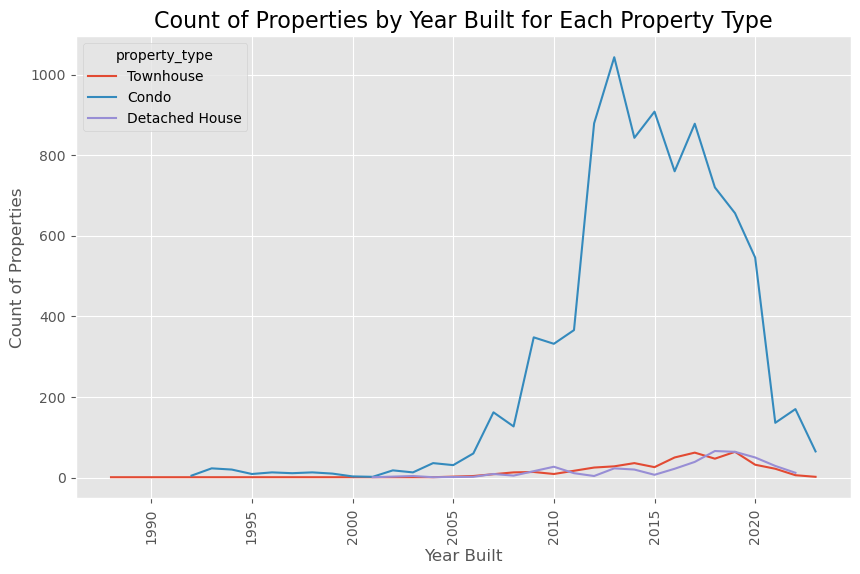

In [91]:
# Plot count of each year_built

df_count = df[(df['is_train'] == 1) & (df['year_built'] != 0)].groupby(['year_built', 'property_type']).size().reset_index(name='count')

plt.figure(figsize=(10, 6))
sns.lineplot(x = 'year_built', y = 'count', hue = 'property_type', data = df_count)

plt.title('Count of Properties by Year Built for Each Property Type', fontsize = 16)
plt.xlabel('Year Built', fontsize = 12)
plt.ylabel('Count of Properties', fontsize = 12)

plt.xticks(rotation=90)
plt.show()

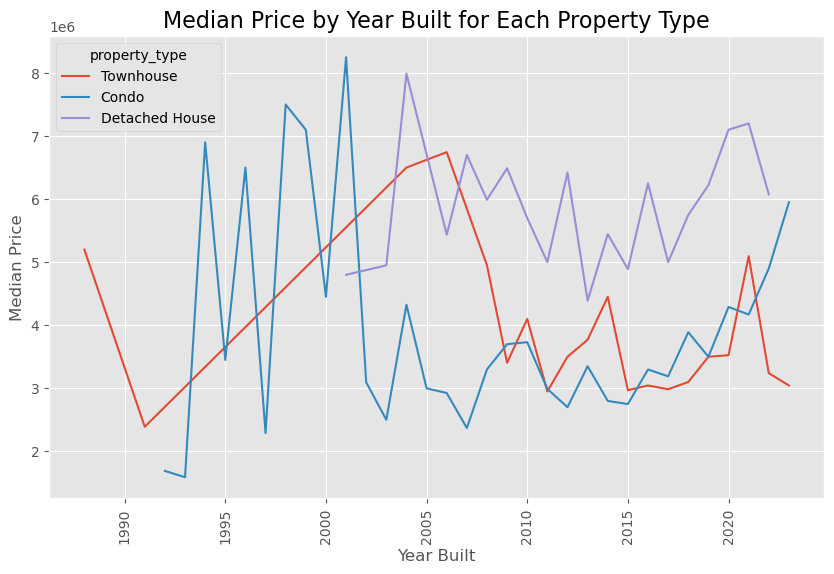

In [92]:
# Plot median price of each year_built

# Group by 'year_built' and 'property_type' and calculate the median price
df_median = df[(df['is_train'] == 1) & (df['year_built'] != 0) ].groupby(['year_built', 'property_type'])['price'].median().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(x = 'year_built', y = 'price', hue = 'property_type', data = df_median)

plt.title('Median Price by Year Built for Each Property Type', fontsize = 16)
plt.xlabel('Year Built', fontsize = 12)
plt.ylabel('Median Price', fontsize = 12)

plt.xticks(rotation = 90)
plt.show()

In [93]:
# Define bins and labels for the year_built_bin
bins = [-float('inf'), 0, 2000, 2005, 2010, 2015, 2020, float('inf')]                                # Bins with an open-ended last interval
labels = ['unknown', '_2000', '2001_2005', '2006_2010', '2011_2015', '2016_2020', '2021_']
df['year_built_bin'] = pd.cut(df['year_built'], bins = bins, labels = labels, right=True)   # Create year_built_bin using pd.cut

In [94]:
# Check the results

df[['year_built_bin','year_built']].value_counts().sort_index()

year_built_bin  year_built
unknown         0             4914
_2000           1988             1
                1991             1
                1992             5
                1993            24
                1994            24
                1995            12
                1996            17
                1997            14
                1998            15
                1999            12
                2000             3
2001_2005       2001             5
                2002            21
                2003            19
                2004            47
                2005            37
2006_2010       2006            77
                2007           197
                2008           172
                2009           453
                2010           421
2011_2015       2011           464
                2012          1070
                2013          1278
                2014          1074
                2015          1094
2016_2020       2016        

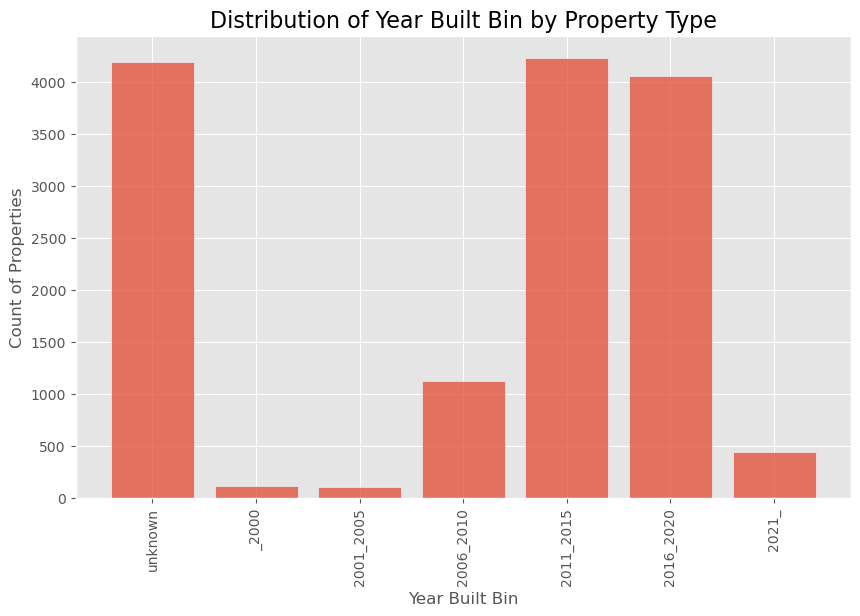

In [95]:
# Check the distribution

plt.figure(figsize=(10, 6))
sns.histplot(data=df[df['is_train'] == 1], x = 'year_built_bin', shrink=0.8)

plt.title('Distribution of Year Built Bin by Property Type', fontsize = 16)
plt.xlabel('Year Built Bin', fontsize=12)
plt.ylabel('Count of Properties', fontsize=12)

plt.xticks(rotation=90)

plt.show()

In [96]:
# Drop columns year_built

df.drop(columns = ['year_built'], inplace = True, errors = 'ignore')

#### `facilities`
- The `facilities` column contains lists of strings. We will extract each string and count its frequency across all rows.
- Afterward, we will create separate columns for grouping them together.
- Thus, we obtain 4 columns, i.e., `has_security`, `has_pool`, `has_sports` and `has_parking`

In [98]:
# count each word in facilities

facility_count = {}                                             # create empty dictionary to store values

for facility_list in df['facilities']:                          # run through all rows
    for facility in facility_list:                              # check value in the list
        if facility in facility_count:
            facility_count[facility] += 1                       # add counter 1, if it is already in dictionary
        else:
            facility_count[facility] = 1                        # add new value to dictionary with counter 1, if it is a new value

# Check the results, descending order
sorted(facility_count.items(), key = lambda item: item[1], reverse = True)

[('24 hours security', 13722),
 ('CCTV', 12365),
 ('Swimming pool', 11762),
 ('Fitness corner', 10777),
 ('Covered car park', 7246),
 ('Car Park', 6476),
 ('Community Garden', 4121),
 ('Lift lobby', 3743),
 ('Gymnasium room', 3121),
 ('Clubhouse', 2957),
 ('Library', 2657),
 ('Mini-Mart', 2490),
 ('Playground', 2422),
 ('Sauna', 2395),
 ('Wading pool', 1584),
 ('Steam bath', 1575),
 ('Sky Lounge', 1572),
 ('Lounge', 1206),
 ('Launderette', 1165),
 ('Open car park', 1068),
 ('Function room', 1065),
 ('Club', 1030),
 ('Pavillion', 1017),
 ('Jacuzzi', 888),
 ("Children's Playground", 750),
 ('Multi-purpose hall', 716),
 ('BBQ pits', 635),
 ('Game room', 615),
 ('Jogging track', 602),
 ('Eateries', 562),
 ('Spa pool', 484),
 ('Meeting room', 418),
 ('Roof Terrace', 381),
 ('Basketball court', 324),
 ('Basement car park', 310),
 ('Pool Deck', 295),
 ('Multi-Storey Car Park', 176),
 ('Tennis courts', 170),
 ('Cafes', 159),
 ('Reflexology Path', 158),
 ('Adult Fitness Stations', 156),
 ('Mini

In [99]:
# The common facilities of top 5 are
# '24 hours security', 'CCTV'                      --> Security
# 'Swimming pool'                                  --> Pool
# 'Fitness corner'                                 --> Fitness & Sports
# 'Covered car park'                               --> Parking
  
# Group facilities of the same kind of top 5 from the results
# Thus, there are 4 groups

# Security
f_security = ['24 hours security'
              , 'CCTV'
             ]

# Pool
f_pool = ['Swimming pool'
          , 'Wading pool'
          , 'Steam bath'
          , 'Sauna'
          , 'Jacuzzi'
          , 'Spa pool'
          , 'Fun pool'
          , 'Lap pool'
          , 'Aerobic pool'
         ]

# Fitness & Sports
f_sports = ['Fitness corner'
            , 'Gymnasium room'
            , 'Adult Fitness Stations'
            , 'Elderly Wellness Stations'
            , 'Tennis courts'
            , 'Badminton hall'
            , 'Squash court'
            , 'Basketball court'
            , 'Jogging track'
            , 'Adventure park'
            , 'Driving range'
            , 'Mini golf range'
            , 'Putting Green'
           ]

# Parking
f_parking = ['Covered car park'
             , 'Car Park'
             , 'Open car park'
             , 'Basement car park'
             , 'Multi-Storey Car Park'
            ]

In [100]:
# Create new columns if list share common element with those groups

def list_in_list(l1,l2):                                                            # function to check that l1, l2 share common elements
    return int(bool(set(l1) & set(l2)))                                             # 1 is not empty set, 0 otherwise


df['has_security'] = df['facilities'].apply(lambda x: list_in_list(x, f_security))  # 1 if property has security, 0 otherwise
df['has_pool'] = df['facilities'].apply(lambda x: list_in_list(x, f_pool))          # 1 if property has pool, 0 otherwise
df['has_sports'] = df['facilities'].apply(lambda x: list_in_list(x, f_sports))      # 1 if property has sports, 0 otherwise
df['has_parking'] = df['facilities'].apply(lambda x: list_in_list(x, f_parking))    # 1 if property has parking, 0 otherwise

In [101]:
# Check the results
df[['facilities','has_security','has_pool','has_sports','has_parking']].head(5)

,facilities,has_security,has_pool,has_sports,has_parking
0,"[Car Park, Community Garden, CCTV, Fitness cor...",1,1,1,1
1,"[CCTV, Fitness corner, 24 hours security, Swim...",1,1,1,0
2,"[Car Park, Clubhouse, Community Garden, CCTV, ...",1,1,1,1
3,"[Covered car park, Playground, 24 hours securi...",1,1,0,1
4,"[Covered car park, 24 hours security]",1,0,0,1


In [102]:
# Drop facilities

df.drop(columns = ['facilities'], inplace = True, errors = 'ignore')

#### Price
- We will remove outlier rows

In [104]:
df.groupby(kc)['price'].agg(
    mean = 'mean'
    , std = 'std'
    , max = 'max'
    , ub = lambda x: x.mean() + 1.96 * x.std()
)

mean           std        max            ub
property_type  is_train                                                     
Condo          0                  NaN           NaN        NaN           NaN
               1         3.911505e+06  2.194978e+06  9999000.0  8.213662e+06
Detached House 0                  NaN           NaN        NaN           NaN
               1         5.578554e+06  1.954258e+06  9990000.0  9.408900e+06
Townhouse      0                  NaN           NaN        NaN           NaN
               1         3.316470e+06  1.701367e+06  9900000.0  6.651150e+06

In [105]:
df.shape

(16771, 25)

In [106]:
# Set the upper bound (to mean +/- 1.96 std by own calculation)
upper_bounds = {
    'Detached House': 9408900,
    'Townhouse': 6653154,
    'Condo': 8212545
}

# Filter the DataFrame
df = df[(df['is_train'] == 0) |
    ((df['is_train'] == 1) & (
        ((df['property_type'] == 'Detached House') & (df['price'] <= upper_bounds['Detached House'])) |
        ((df['property_type'] == 'Townhouse') & (df['price'] <= upper_bounds['Townhouse'])) |
        ((df['property_type'] == 'Condo') & (df['price'] <= upper_bounds['Condo']))
    ))
]

---

### Export
- The exported file `housing.csv` contain 25 features and 16067 records.
- The 25 features are listed here
  - `id`
  - `province`
  - `district`
  - `property_type`
  - `bedrooms`
  - `baths`
  - `floor_area`
  - `log_floor_area`
  - `floor_level`
  - `land_area`
  - `log_land_area`
  - `nearby_stations`
  - `nearest_station_name` i.e., the name of the nearest BTS or MRT station to the property is used, and set to 'unknown' if none is available.
  - `nearest_station_distance` i.e., the distance from `nearest_station_name` in meters, and set to 0 if none is avaiable.
  - `nearby_supermarkets`
  - `has_many_bedrooms` i.e., set to 1 if the property has more bedrooms than the median value. 
  - `has_many_baths` i.e., set to 1 if the property has more bathrooms than the median value.  
  - `has_bus_stops`
  - `year_built_bin` i.e., grouping of the year built into categories such as 'unknown', 'before 2000', and other relevant classifications
  - `has_security` i.e., set to 1 if the property includes security
  - `has_pool` i.e., set to 1 if the property includes swimming pool
  - `has_sports` i.e., set to 1 if the property includes fitness and sports facilities
  - `has_parking` i.e., set to 1 if the property includes parking area
  - `price`
  - `is_train`

In [109]:
df.columns

Index(['id', 'province', 'district', 'property_type', 'bedrooms', 'baths',
       'floor_area', 'floor_level', 'land_area', 'nearby_stations',
       'nearby_supermarkets', 'price', 'is_train', 'has_many_bedrooms',
       'has_many_baths', 'log_floor_area', 'log_land_area',
       'nearest_station_name', 'nearest_station_distance', 'has_bus_stops',
       'year_built_bin', 'has_security', 'has_pool', 'has_sports',
       'has_parking'],
      dtype='object')

In [110]:
# Reorder the columns

new_column_order = [
    'id'
    , 'province'
    , 'district'
    , 'property_type'
    , 'bedrooms'
    , 'baths'
    , 'floor_area'
    , 'log_floor_area'
    , 'floor_level'
    , 'land_area'
    , 'log_land_area'
    , 'nearby_stations'
    , 'nearest_station_name'
    , 'nearest_station_distance'
    , 'nearby_supermarkets'
    , 'has_many_bedrooms'
    , 'has_many_baths'
    , 'has_bus_stops'
    , 'year_built_bin'
    , 'has_security'
    , 'has_pool'
    , 'has_sports'
    , 'has_parking'
    , 'price'
    , 'is_train'
]

df = df[new_column_order]

In [111]:
df.dtypes

id                             int64
province                      object
district                      object
property_type                 object
bedrooms                     float64
baths                        float64
floor_area                     int64
log_floor_area               float64
floor_level                  float64
land_area                    float64
log_land_area                float64
nearby_stations                int64
nearest_station_name          object
nearest_station_distance       int64
nearby_supermarkets          float64
has_many_bedrooms              int64
has_many_baths                 int64
has_bus_stops                  int64
year_built_bin              category
has_security                   int64
has_pool                       int64
has_sports                     int64
has_parking                    int64
price                        float64
is_train                       int64
dtype: object

In [112]:
df['year_built_bin']

1        2011_2015
2        2016_2020
3          unknown
4          unknown
6        2011_2015
           ...    
16766    2016_2020
16767    2006_2010
16768    2006_2010
16769    2016_2020
16770    2011_2015
Name: year_built_bin, Length: 16072, dtype: category
Categories (7, object): ['unknown' < '_2000' < '2001_2005' < '2006_2010' < '2011_2015' < '2016_2020' < '2021_']

In [113]:
#df.to_csv('../data/housing_clean.csv', index = False)